<a href="https://colab.research.google.com/github/on-kulyashov/RQC-projects/blob/main/fermions_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]
p, q = (0, 1)
S = 
[[-0.+0.j]]
Q = 
[[-0.+0.j]]
G = 
[[0.3560562+0.25304545j]]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

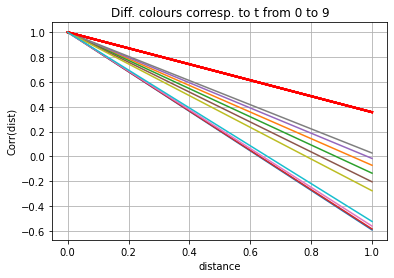

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


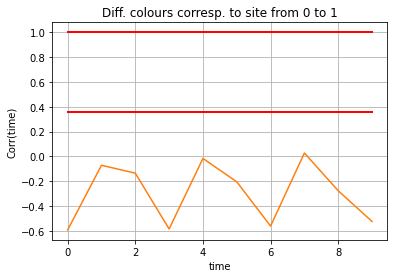

In [ ]:
!pip install pfapack

import numpy as np
from scipy.linalg import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import expm, sinm, cosm
from scipy.integrate import quad
from sklearn.preprocessing import normalize
from pfapack import pfaffian as pf


from pfapack import pfaffian as pf
import numpy.matlib

# # first real matrices
# A = numpy.matlib.rand(100, 100)
# A = A - A.T
# pfa1 = pf.pfaffian(A)
# pfa2 = pf.pfaffian(A, method="H")
# pfa3 = pf.pfaffian_schur(A)

def pmatrix(a):
    """Returns a LaTeX pmatrix

    :a: numpy array
    :returns: LaTeX pmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('pmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{pmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{pmatrix}']
    return '\n'.join(rv)

 
# with open('test_fermi') as f:
#     h = list(map(float, (f.readline()).split(" ")))
#     j = list(map(float, (f.readline()).split(" ")))
#     T = float(f.readline())
# n = len(h)
 
n = 2

# hmax = 0.5
# T1, T2 = 0.5, 2  # 0.001, 0.033
# seed = 53
# np.random.seed(seed)
# j = np.random.uniform(size=(n-1))
# h = np.random.uniform(0, hmax, size=n)
# T = np.random.uniform(T1,T2)
# with open('test_fermi', "w") as f: # for first compilation change w to x
#     f.write(str(h) + " \n " + str(j) + " \n " + str(T))
 
 
# long-distance limit

# g = hmax # g = 1 - critical, g must be close to one 
# a = 0.01 # goes to zero
# J = 3 # goes to infinity
# c = 2 * J * a
# delta = 2 * J * (1 - g)
# z = J**(-0.25)
time = np.arange(0,10,1)
T = 0
# j1 = -3 * np.full(n, 1)
# j2 = -3 * np.full(n, 1)
# h1 = -2 * np.full(n, 1)
# h2 = -2.1 * np.full(n, 1)
j1 = np.array([-3,-3.1, -3.3])
j2 = np.array([-2.9,-3.05,-3.07])
h1 = np.array([-2, -2.08, -2.22])
h2 = np.array([-4.9,-5.2, -5.13])

def f_i(s):
    def integrand(y):
        return np.log(np.tanh((y**2 + s**2)**(0.5) / 2))
    return abs(s) * np.heaviside(s, 0.5) - (1 / np.pi) * quad(integrand, 0, float('inf'))[0]
 
 
def g_i(s):
    def integrand(y):
        def integrand_f(w):
            return y / (np.sinh(np.sqrt(y**2 + w**2))*np.sqrt(y**2 + w**2))
        a = 0
        if y <= 0:
            a = -1
        return (a  + (1 / np.pi) * quad(integrand_f, 0, float('inf'))[0])**2 / y
    return np.exp(quad(integrand, s, float('inf'))[0]) + np.log(s) / 4
 
 
def sigma_z_ld(x):
    return z * T**(0.25) * g_i(delta / T) * np.exp(-T*abs(x)*f_i(delta / T) / c)
 
 
# ising limit
 
def ising_correl(x):
    # for periodic border
    # lmin = 2 * np.sinh(J / T)
    # lpls = 2 * np.cosh(J / T)
    # z = lmin**n + lpls**n
    # return ((lmin**x) * (lpls**(n-x)) + (lpls**x) * (lmin**(n-x))) / z
    return np.tanh(J / T)**x
 
 
# direct solution
pauli = np.array([ [[0,1],[1,0]], [[0,-1j],[1j,0]], [[1,0],[0,-1]] ])
dbl_pauli = np.array([np.kron(a,a) for a in pauli])
 
# hamiltonian construction
def Hamiltonian(h, j):
    H = np.zeros(2**n)
    for i in range(n-1):
        H = H + j[i]*np.kron(np.kron(np.eye(2**i), dbl_pauli[2]), np.eye(2**(n-2-i)))
    for i in range(n):
        H = H + h[i]*np.kron(np.kron(np.eye(2**i), pauli[0]), np.eye(2**(n-1-i)))
    return -np.real_if_close(H) 


def direct_evolution(state, dt):
    u = expm(-1j * dt * Hamiltonian(h2, j2))
    uH = np.conj(np.transpose(u))
    return np.matmul(u, np.matmul(state, uH))

def integrate(f, sol0, time):
    sol = [sol0]
    for i in range(1, len(time)):
        sol.append(f(sol[-1], (time[i] - time[i-1])))
    return sol

def magn_total_direct(state, direction):
    magn = np.zeros(2**n)
    for i in range(n):
        magn = magn + np.kron(np.kron(np.eye(2**i), pauli[direction]), np.eye(2**(n-1-i)))
    return np.trace(np.matmul(state, magn))

def magn_site_direct(state, direction, i):
    magn = np.kron(np.kron(np.eye(2**i), pauli[direction]), np.eye(2**(n-1-i)))
    return np.trace(np.matmul(state, magn))

def initial_state_direct(temperature, hamilt):
    if temperature:
        dens_direct = expm(-hamilt / temperature)
        dens_direct = dens_direct / np.trace(dens_direct)
        return dens_direct
    else:
        E, V = np.linalg.eigh(hamilt)
        E = np.real_if_close(E)
        V = np.real_if_close(V)
        idx = np.argsort(E)
        E = E[idx]
        V = V[:,idx]
        return np.tensordot(V[:,0], np.transpose(V[:,0]), axes=0)

# correlator construction
def sigma_z(i, j):
    if i - j:
        return np.real(np.kron(np.kron(np.kron(np.kron(np.eye(2**i), pauli[2]), np.eye(2**(j-i-1))), pauli[2]), np.eye(2**(n-j-1))))
    return np.real(np.kron(np.kron(np.eye(2**i), np.matmul(pauli[2], pauli[2])), np.eye(2**(n-i-1))))
 
def s_direct(i0, j0, dens_direct):
    i = min(i0, j0)
    j = max(i0, j0)
    return np.trace(np.matmul(dens_direct, sigma_z(i,j)))

# Young's solution
 
def hamiltonian(h, j):
    '''
    calculates hamiltonian from field and bonds values
    '''
    mid = np.zeros((n, n))
    up = np.zeros((n, n))
    dn = np.zeros((n, n))
    for i in range(n):
        mid[i][i] = float(h[i])
    for i in range(n-1):
        up[i][i+1] = float(j[i]) / 2
        dn[i+1][i] = float(j[i]) / 2
    a = (mid - up - dn)
    b = -(up - dn)
    return np.block([[a, b], [-b, -a]])


def gamma_ij_new_t(old_occ_nums, new2old, energies, i, j, time):
    '''
    calculates new occupation numbers (icluding cross-terms) at given time
    i, j = (muber, conjugacy)
    energies = (e1, ..., en, ) - all positive eigenvals of ham (energy/2)
    new2old - transfer matrix: (g1 ... g1^T ...)_old = new2old * (g1 ... g1^T ...)_new 
    '''
    def gamma_ij_new(old_occ_nums, new2old, i, j):
        '''
        calculates new occupation numbers (icluding cross-terms) at time = 0 
        from initial (old) occupation numbers
        '''
        return np.matmul(np.transpose(np.matmul(np.diag(old_occ_nums), new2old[:, i])), new2old[:, j]) # TODO: check asymmetry in i, j

    def evolution(energies, i, j):
        '''
        calculates evolution exponent for product of two new gammas
        '''
        return np.exp(-2j*(energies[i] + energies[j]))

    return gamma_ij_new(old_occ_nums, new2old, i, j) * evolution(energies, i, j)

def c_ij_t(newU, old_occ_nums, new2old, energies, i, j, time):
    '''
    calculates c-correlators from gamma(new)-correlators
    '''
    return np.sum(np.array([[newU[k,i] * newU[l,j] * gamma_ij_new_t(old_occ_nums, new2old, energies, k, l, time) for k in range(2 * n)] for l in range(2 * n)]))

def sub_mat(newU, old_occ_nums, new2old, energies, p, q, time, sub_mat_type):
    '''
    constructs submatrices S, G, Q from c-correlators
    p, q are sites for which correlator is calculated
    '''
    matrix = np.ones((q - p, q - p))
    if sub_mat_type == 'S':
        p1 = p
        p2 = q - 1
        q1 = p
        q2 = q - 1
        signs = np.array([1,1,1,1])
        matrix = matrix - np.eye(q - p)
    elif sub_mat_type == 'G':
        p1 = p + 1
        p2 = q
        q1 = p
        q2 = q - 1
        signs = np.array([1,1,1,1])
    elif sub_mat_type == 'Q':
        p1 = p + 1
        p2 = q
        q1 = p + 1
        q2 = q
        signs = np.array([1,1,1,1])
        matrix = matrix - np.eye(q - p)
    def elem(l, m):
        cln_cmn = c_ij_t(newU, old_occ_nums, new2old, energies, l + n, m + n, time)
        cl_cm = c_ij_t(newU, old_occ_nums, new2old, energies, l, m, time)
        cln_cm = c_ij_t(newU, old_occ_nums, new2old, energies, l + n, m, time)
        cl_cmn = c_ij_t(newU, old_occ_nums, new2old, energies, l, m + n, time)
        return np.matmul(signs, np.array([cln_cmn, cln_cm, cl_cmn, cl_cm]))
    return np.array([[elem(a, b) for b in range(p1, p2+1)] for a in range(q1, q2+1)]) * matrix
    
def Rho(newU, old_occ_nums, new2old, energies, p, q, time):
    '''
    assembles main matrix from submatrices S, G, Q and returns its pfaffian
    '''
    S = sub_mat(newU, old_occ_nums, new2old, energies, p, q, time, 'S')
    Q = sub_mat(newU, old_occ_nums, new2old, energies, p, q, time, 'Q')
    G = sub_mat(newU, old_occ_nums, new2old, energies, p, q, time, 'G')
    print("p, q = {}".format((p, q)))
    print("S = \n{}".format(S))
    print("Q = \n{}".format(Q))
    print("G = \n{}".format(G))
    return pf.pfaffian(np.block([[S, G], [-G, Q]]))

def new2old(oldU, newU):
    '''
    returns transfer matrix between old and new gammas
    '''
    return np.matmul(np.transpose(newU), oldU)

def e_u(ham):
    '''
    returns e - eigenenrgies of ham: e1, e2, ... -e1, -e2, ... and
    u - transfer: gamma = u * c
    '''
    e, u = np.linalg.eigh(ham)
    idx = np.argsort(e)[::-1]
    e = e[idx]
    e = np.concatenate((e[:n], e[-1:n-1:-1]))
    u = u[:,idx]
    u = np.concatenate((u[:,:n], u[:,-1:n-1:-1]), axis=1)
    return (e, u)

def oc_num_0(T, e):
    '''
    from temperature and initial energies calculates
    initial (old) occupation numbers (gamma^dagger gamma)
    '''
    if T:
        nums = (1 / (1 + np.exp(2 * e[:n] / T)))
        return np.concatenate((nums, 1 - nums))
    return np.concatenate((np.zeros(n), np.ones(n)))

def correl(p, q, time):
    '''
    calculates correlator(time) between p, q sites
    '''
    if q == p:
        return 1
    p = min(p, q)
    q = max(p, q)
    e1, u1 = e_u(hamiltonian(h1, j1))
    e2, u2 = e_u(hamiltonian(h2, j2))
    return Rho(u2, oc_num_0(T, e1), new2old(u1, u2), e2, p, q, time)
  
def fit_func(x, l):
    return np.exp(-x/l)
 
start = 0
finish = n
correlations = np.array([[correl(start, x, t) for t in time] for x in range(start, finish)])
# corr_direct = np.real_if_close(np.array([s_direct(start, x) for x in range(start, finish)]))
# norm = corr_direct[0]
# corr_direct = corr_direct / norm
dist = np.arange(n)
# popt, pcov = curve_fit(fit_func, dist, correlations)
# plt.plot(dist, fit_func(dist, *popt), 'r--', linewidth=2.0)
# # plt.plot(dist, ising_correl(dist), 'm-', linewidth=2.0)
# # plt.plot(dist, sigma_z_ld(dist), 'b-', linewidth=2.0)
# plt.plot(dist, corr_direct, 'g-', linewidth=2.0)
# plt.xlabel("distance")
# plt.ylabel("Corr(dist)")
# plt.legend(["Correlations", "Exp fit", "Direct"])
# plt.title("H_max / J_max = {}, T = {}, Corr len = {}".format(np.round(hmax,2), np.round(T,4), np.round(*popt,2)))
# plt.grid()
# plt.show()
dens_evol = integrate(direct_evolution, initial_state_direct(T, Hamiltonian(h1, j1)), time)
dens0 = dens_evol[0]
corr_direct_time_space = np.array([[np.real_if_close(s_direct(0, x, dens)) for dens in dens_evol] for x in range(start, finish)])
for t in range(len(time)):
    plt.plot(dist, correlations[:,t], 'r-', linewidth=2.0)
    plt.plot(dist, corr_direct_time_space[:,t])
plt.xlabel("distance")
plt.ylabel("Corr(dist)")
plt.title("Diff. colours corresp. to t from {} to {}".format(np.round(time[0], 2), np.round(time[-1], 2)))
plt.grid()
plt.show()

for x in range(n):
    plt.plot(time, corr_direct_time_space[x,:])
    plt.plot(time, correlations[x,:], 'r-', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Corr(time)")
plt.title("Diff. colours corresp. to site from 0 to {}".format(n-1))
plt.grid()
plt.show()

# magn_evol_longt = np.array([np.real_if_close(magn_total_direct(dens, 0)) for dens in dens_evol])
# plt.plot(time, magn_evol_longt)
# plt.xlabel("time")
# plt.ylabel("Total x magn-n(t)")
# plt.title("Total magnetization along h")
# plt.grid()
# plt.show()

# magn_evol_trans1 = np.array([np.sqrt(abs(magn_site_direct(dens, 0, 1))**2 + abs(magn_site_direct(dens, 1, 1))**2 + abs(magn_site_direct(dens, 2, 1))**2)  for dens in dens_evol])
# plt.plot(time, magn_evol_trans1)
# # magn_evol_trans0 = np.array([np.sqrt(abs(magn_site_direct(dens, 0, 0))**2 + abs(magn_site_direct(dens, 1, 0))**2 + abs(magn_site_direct(dens, 2, 0))**2)  for dens in dens_evol])
# # plt.plot(time, magn_evol_trans0)
# # plt.yscale('log')
# plt.xlabel("time")
# plt.ylabel("site length magn-n(t)")
# plt.title("site len m")
# plt.grid()
# plt.show()

# magn_evol_trans = np.array([np.real_if_close(magn_total_direct(dens, 2)) for dens in dens_evol])
# plt.plot(time, magn_evol_trans)
# # plt.yscale('log')
# plt.xlabel("time")
# plt.ylabel("Total z magn-n(t)")
# plt.title("Total magnetization perp h")
# plt.grid()
# plt.show()

# magn_evol_trans = np.array([np.real_if_close(magn_total_direct(dens, 1)) for dens in dens_evol])
# plt.plot(time, magn_evol_trans)
# # plt.yscale('log')
# plt.xlabel("time")
# plt.ylabel("Total y magn-n(t)")
# plt.title("Total magnetization perp h")
# plt.grid()
# plt.show()